<a href="https://colab.research.google.com/github/Harshubh-Meherishi/Neural-Networks-with-PyTorch/blob/master/MNIST_using_MLP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms




In [2]:
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor()]) 

test_transforms = transforms.Compose([transforms.ToTensor()])

train_data = datasets.MNIST(root = 'data', train = True, download = True, transform = train_transforms)
test_data = datasets.MNIST(root = 'data', train = False, download=True, transform= test_transforms)

trainloader = torch.utils.data.DataLoader(train_data,batch_size =20, shuffle = True)
testloader = torch.utils.data.DataLoader(test_data,batch_size =20, shuffle = True)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


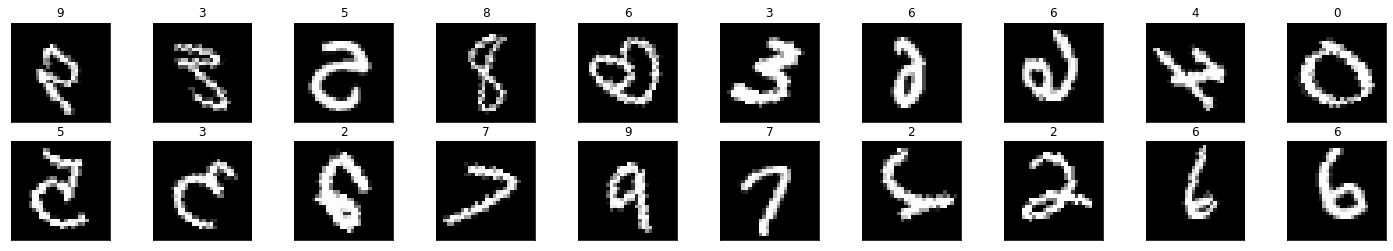

In [8]:
%matplotlib inline
dataiter = iter(trainloader)
images,labels = dataiter.next()
images = images.numpy()

fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
  ax = fig.add_subplot(2,20/2,idx+1,xticks=[],yticks = [])
  ax.imshow(np.squeeze(images[idx]),cmap ='gray')
  ax.set_title(str(labels[idx].item()))

# Defining MLP Network

In [18]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(784,512)
    self.fc2 = nn.Linear(512,512)
    self.fc3 = nn.Linear(512,10)
    self.dropout = nn.Dropout(p = 0.2)

  def forward(self,x):
    x = x.view(x.shape[0],-1)
    x = self.dropout(F.relu(self.fc1(x)))
    x = self.dropout(F.relu(self.fc2(x)))
    x = F.log_softmax(self.fc3(x), dim =1)
    return x

model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003)
epochs = 30
for e in range(epochs):
  running_loss = 0.0
  for images,labels in trainloader:
    optimizer.zero_grad()
    output = model.forward(images)
    loss = criterion(output,labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()*images.size(0)
  
  running_loss = running_loss/len(trainloader.dataset)
  print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        e+1, 
        running_loss
        ))


Epoch: 1 	Training Loss: 0.220681
Epoch: 2 	Training Loss: 0.198236
Epoch: 3 	Training Loss: 0.185902
Epoch: 4 	Training Loss: 0.186691
Epoch: 5 	Training Loss: 0.175380
Epoch: 6 	Training Loss: 0.170506
Epoch: 7 	Training Loss: 0.173411
Epoch: 8 	Training Loss: 0.167926
Epoch: 9 	Training Loss: 0.159805
Epoch: 10 	Training Loss: 0.157268
Epoch: 11 	Training Loss: 0.154165
Epoch: 12 	Training Loss: 0.159950
Epoch: 13 	Training Loss: 0.151628
Epoch: 14 	Training Loss: 0.151753
Epoch: 15 	Training Loss: 0.145181
Epoch: 16 	Training Loss: 0.147168
Epoch: 17 	Training Loss: 0.142337
Epoch: 18 	Training Loss: 0.142456
Epoch: 19 	Training Loss: 0.139344
Epoch: 20 	Training Loss: 0.139715
Epoch: 21 	Training Loss: 0.137659
Epoch: 22 	Training Loss: 0.138436
Epoch: 23 	Training Loss: 0.134335
Epoch: 24 	Training Loss: 0.135502
Epoch: 25 	Training Loss: 0.135746
Epoch: 26 	Training Loss: 0.135328
Epoch: 27 	Training Loss: 0.133895
Epoch: 28 	Training Loss: 0.132537
Epoch: 29 	Training Loss: 0.1

In [24]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
batch_size =20
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in testloader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(testloader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.123534

Test Accuracy of     0: 99% (974/980)
Test Accuracy of     1: 98% (1114/1135)
Test Accuracy of     2: 96% (999/1032)
Test Accuracy of     3: 95% (960/1010)
Test Accuracy of     4: 96% (944/982)
Test Accuracy of     5: 95% (851/892)
Test Accuracy of     6: 97% (930/958)
Test Accuracy of     7: 97% (1005/1028)
Test Accuracy of     8: 95% (935/974)
Test Accuracy of     9: 96% (975/1009)

Test Accuracy (Overall): 96% (9687/10000)


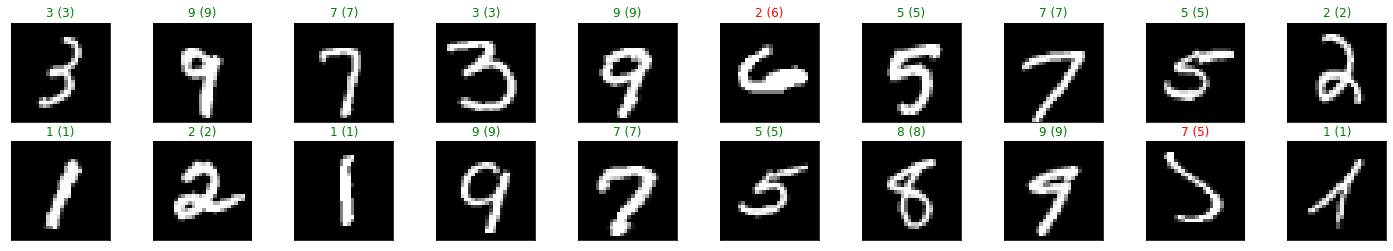

In [25]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))